In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [10]:
# Generación de datos
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', end = '2023-12-31')
values = np.arange(len(dates)) * 0.2 + np.random.randn(len(dates)) * 50
ts = pd.Series(values, index=dates)

In [11]:
# División de los datos en train y test
train_data = ts[:'2023-10-01']
test_data = ts['2023-10-02':]

In [12]:
# Ajuste del modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [13]:
# Pronóstico
forecast = model_fit.forecast(steps=len(test_data))

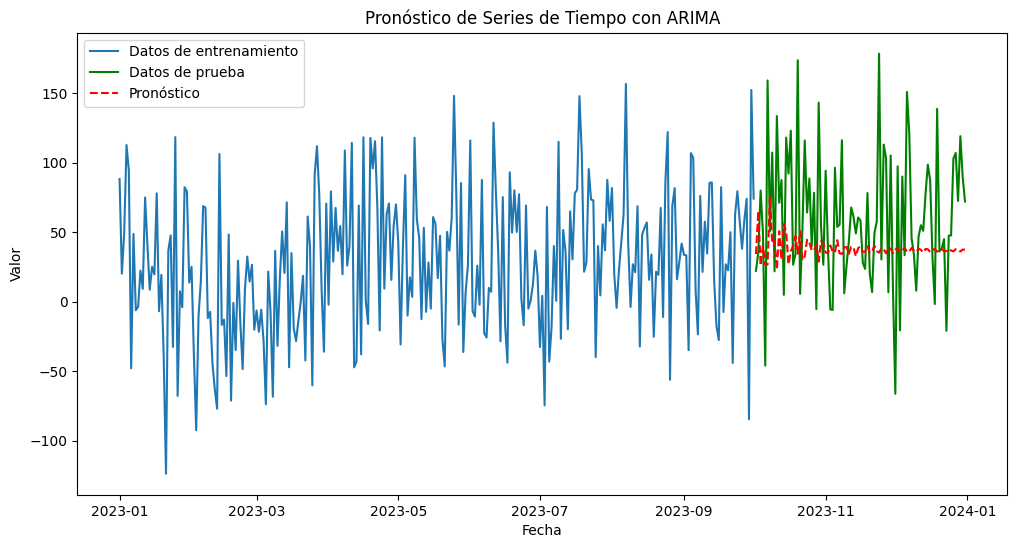

In [14]:
# Gráfico de datos originales y su pronóstico
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Datos de entrenamiento')
plt.plot(test_data, label='Datos de prueba', color='green')
plt.plot(test_data.index, forecast, label='Pronóstico', color='red', linestyle='--')
plt.legend()
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Pronóstico de Series de Tiempo con ARIMA')
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# División de los datos en train y test
train_data, test_data = train_test_split(ts, test_size=0.2, shuffle=False)

# Ajuste del modelo ARIMA
model = ARIMA(train_data, order=(10, 1, 10))
model_fit = model.fit()

# Pronóstico
forecast = model_fit.forecast(steps=len(test_data))

# Cálculo del error
mae = mean_squared_error(test_data, forecast)
print(f'Mean Absolute Error (MAE): {mae}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Mean Absolute Error (MAE): 2472.567467457821


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
